Рассмотрим основные моменты не вошедшие в предыдущие лекции

Обновим и подключим библиотеки:

In [ ]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn==0.23.0

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.1.1)
Requirement already up-to-date: scikit-learn==0.23.0 in /usr/local/lib/python3.6/dist-packages (0.23.0)


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Импортируем датасет MNIST.

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

Объем тренировочного набора данных:

In [ ]:
len(X_train), len(X_pred)

(60000, 10000)

Посмотрим, что из себя представляет, например, нулевой объект.

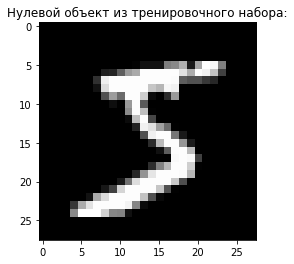

In [ ]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")

Отклик нулевого объекта из тренировочного набора:

In [ ]:
X_train.shape

(60000, 28, 28)

PCA -метод главных компонент

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50, svd_solver='full')

dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)

X_full = pca.fit_transform(X_train)
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)
for idx in range(0, len(explained_variance)):
  var = explained_variance[idx]
  if var > 0.68:
    print(idx + 1, ' ', var)
    break

24   0.683


In [ ]:
explained_variance

array([0.097, 0.168, 0.23 , 0.284, 0.332, 0.375, 0.408, 0.437, 0.465,
       0.488, 0.509, 0.529, 0.547, 0.564, 0.579, 0.594, 0.607, 0.62 ,
       0.632, 0.644, 0.654, 0.664, 0.674, 0.683, 0.692, 0.7  , 0.708,
       0.716, 0.724, 0.731, 0.737, 0.744, 0.75 , 0.755, 0.761, 0.767,
       0.772, 0.777, 0.781, 0.786, 0.791, 0.795, 0.799, 0.803, 0.807,
       0.811, 0.815, 0.818, 0.821, 0.825])

Reduce dim

In [ ]:
pca = PCA(n_components=24, svd_solver='full')
modelPCA = pca.fit(X_train)
X_train = modelPCA.transform(X_train)
X_train.shape

(60000, 24)

Divide source dataset into test and train datasets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=12)

In [ ]:
X_train.shape, X_test.shape

((42000, 24), (18000, 24))

In [ ]:
train = X_train
SIZE = len(train)
summa = 0
for i in range(SIZE):
  summa += train[i][0]
summa / SIZE

-1.0583553143209037

Random forest classifier

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier(criterion='gini', min_samples_leaf=10,
                                           max_depth=20,
                                           n_estimators=10,
                                           random_state=12)
clfRf = OneVsRestClassifier(randomForestModel).fit(X_train, y_train)
y_pred = clfRf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)[7][7]

1748

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegressionModel = LogisticRegression(solver='lbfgs', random_state=12)
clfLr = OneVsRestClassifier(logisticRegressionModel).fit(X_train, y_train)
y_pred = clfLr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)[5][5]

1227

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decisionTreeModel = DecisionTreeClassifier(criterion='gini', min_samples_leaf=10,
                                           max_depth=20, random_state=12)
clfDt = OneVsRestClassifier(decisionTreeModel).fit(X_train, y_train)
y_pred = clfDt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)[1][1]

1941

Read file

In [ ]:
import pandas as pd

df = pd.read_csv('pred_for_task.csv')
df.head()

,FileName,Label,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,f779,f780,f781,f782,f783
0,file1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,file2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,file3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,file4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,file5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(30, 786)

In [ ]:
data = df.iloc[:,2:].values.tolist()
len(data), len(data[0])

(30, 784)

Logistic regression

In [ ]:
tr_data = modelPCA.transform(data)
tr_data.shape

(30, 24)

In [ ]:
cl = clfLr.predict(tr_data)[23]
clfLr.predict_proba(tr_data)[23][cl]

0.9245509183271746

Random Forest

In [ ]:
cl = clfRf.predict(tr_data)[8]
clfRf.predict_proba(tr_data)[8][cl]

0.28742902779173995

Decision Tree

In [ ]:
cl = clfDt.predict(tr_data)[8]
clfDt.predict_proba(tr_data)[8][cl]

0.6666666666666667